In [27]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Import Data

In [32]:
data = pd.read_csv('clustering.csv', delimiter=';', decimal=',')

time = data['time']
time_1 = data['time_1']
time_2 = data['time_2']
time_3 = data['time_3']
jerk = data['mean_jerk_vector']
jerk_1 = data['mean_jerk_1_vector']
jerk_2 = data['mean_jerk_2_vector']
jerk_3 = data['mean_jerk_3_vector']
gender = data['gender']

clustering = [[t, j] for t, j in zip(time, jerk)]
data = np.array(clustering)
data_1 = np.array([[t, j] for t, j in zip(time_1, jerk_1)])
data_2 = np.array([[t, j] for t, j in zip(time_2, jerk_3)])
data_3 = np.array([[t, j] for t, j in zip(time_3, jerk_3)])

# K Means

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 1 2 0 0 0 2 0 0 1 2 2 0 0 0]


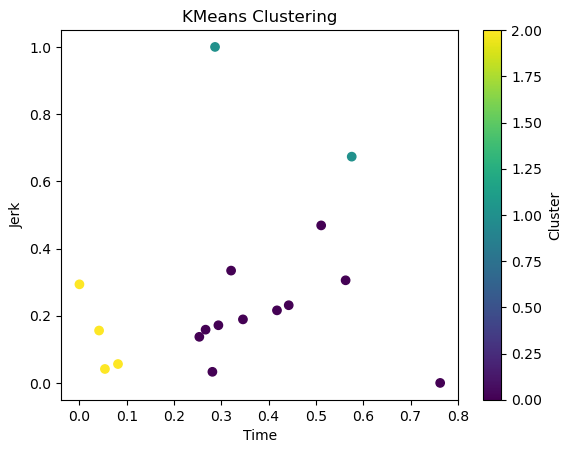

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(data)
print(kmeans.labels_)

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Jerk')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

Calculate gender based climbers per cluster and plot the clusters with the gender information

Cluster 0: 5 females, 6 males
Cluster 1: 1 females, 1 males
Cluster 2: 2 females, 2 males


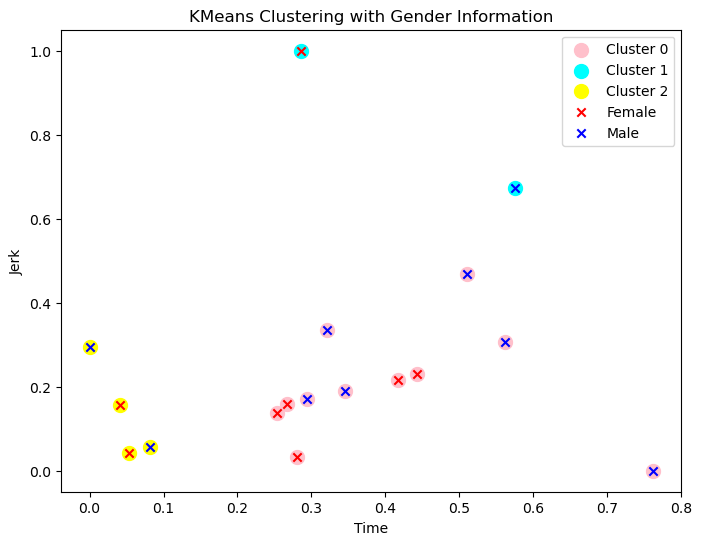

In [37]:
# Gender based counting per cluster
female_counts = {}
male_counts = {}

# Iterate over each cluster
for cluster_label in range(3):
    cluster_data = data[kmeans.labels_ == cluster_label]
    
    female_counts[cluster_label] = np.sum((gender == 0) & (kmeans.labels_ == cluster_label))
    male_counts[cluster_label] = np.sum((gender == 1) & (kmeans.labels_ == cluster_label))

# Print
for cluster_label in range(3):
    print(f"Cluster {cluster_label}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

# Plot
colors = ['pink', 'cyan', 'yellow']
plt.figure(figsize=(8, 6))
for cluster_label in range(3):
    cluster_data = data[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=100, label=f'Cluster {cluster_label}')

# Plot females as red crosses
plt.scatter(data[(gender == 0), 0], data[(gender == 0), 1], c='red', marker='x', label='Female')

# Plot males blue crosses
plt.scatter(data[(gender == 1), 0], data[(gender == 1), 1], c='blue', marker='x', label='Male')

plt.xlabel('Time')
plt.ylabel('Jerk')
plt.title('KMeans Clustering with Gender Information')
plt.legend()
plt.show()

Cluster 0: 5 females, 6 males
Cluster 1: 1 females, 1 males
Cluster 2: 2 females, 2 males


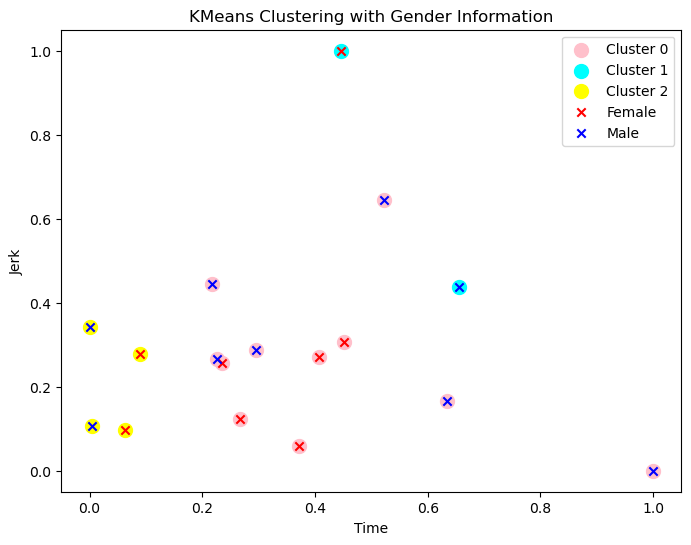

In [38]:
# Gender based counting per cluster
female_counts = {}
male_counts = {}

# Iterate over each cluster
for cluster_label in range(3):
    cluster_data = data[kmeans.labels_ == cluster_label]
    
    female_counts[cluster_label] = np.sum((gender == 0) & (kmeans.labels_ == cluster_label))
    male_counts[cluster_label] = np.sum((gender == 1) & (kmeans.labels_ == cluster_label))

# Print
for cluster_label in range(3):
    print(f"Cluster {cluster_label}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

# Plot
colors = ['pink', 'cyan', 'yellow']
plt.figure(figsize=(8, 6))
for cluster_label in range(3):
    cluster_data = data_1[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=100, label=f'Cluster {cluster_label}')

# Plot females as red crosses
plt.scatter(data_1[(gender == 0), 0], data_1[(gender == 0), 1], c='red', marker='x', label='Female')

# Plot males blue crosses
plt.scatter(data_1[(gender == 1), 0], data_1[(gender == 1), 1], c='blue', marker='x', label='Male')

plt.xlabel('Time')
plt.ylabel('Jerk')
plt.title('KMeans Clustering with Gender Information')
plt.legend()
plt.show()